# Efficiency

## Orders of Growth

### Helper Function

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rc('font', size=16)

from timeit import repeat
from numpy import median, percentile

def plot_times(name, xs, n=15):
    f = lambda x: name + '(' + str(x) + ')'
    g = globals()
    
    samples = []
    for _ in range(n):
        times = lambda x: repeat(f(x), globals=g, number=1, repeat=n)
        samples.append([median(times(x)) for x in xs])
    ys = [10e3 * median(sample) for sample in zip(*samples)]
    
    plt.figure(figsize=(8, 8))
    plt.plot(xs, ys)
    plt.xlabel('n')
    plt.ylabel('milliseconds')

### Logarithmic Growth

In [2]:
def exp_fast(b, n):
    if n == 0:
        return 1
    elif n % 2 == 0:
        return square(exp_fast(b, n//2))
    else:
        return b * exp_fast(b, n-1)
    
def square(x):
    return x*x

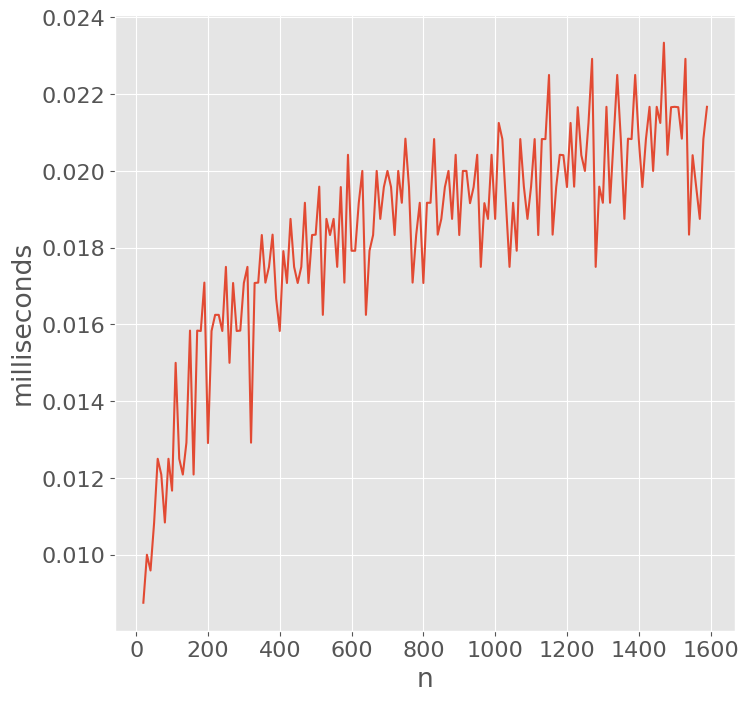

In [3]:
exp_2_fast = lambda n: exp_fast(2.0, n)
plot_times('exp_2_fast', range(20, 1600, 10))

### Linear Growth

In [4]:
def exp(b, n):
    if n == 0:
        return 1
    else:
        return b * exp(b, n-1)

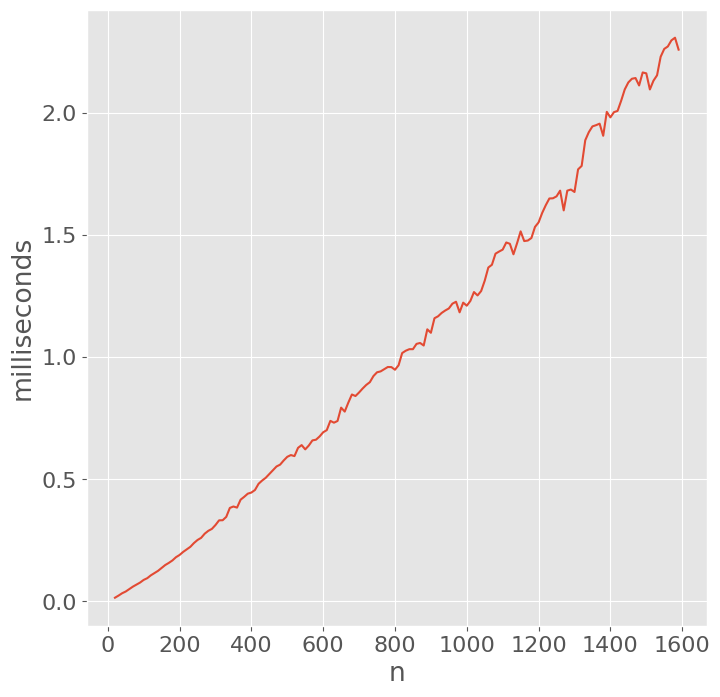

In [5]:
exp_2 = lambda n: exp(2, n)
plot_times('exp_2', range(20, 1600, 10))

### Quadratic Growth

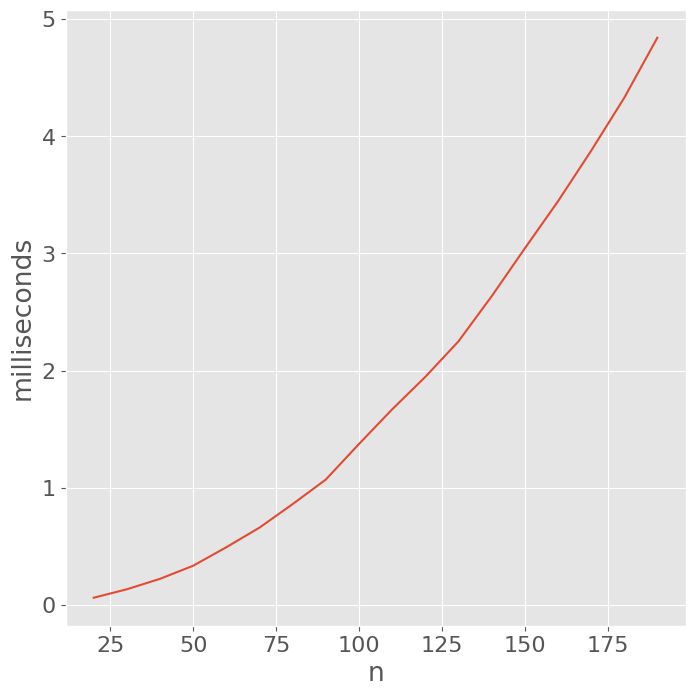

In [6]:
def overlap(a, b):
    count = 0
    for item in a: # n times
        for other in b: # n times
            if item == other:
                count += 1
    return count

overlap_ranges = lambda n: overlap(list(range(n)), list(range(n)))

plot_times('overlap_ranges', range(20, 200, 10))

### Exponential Growth

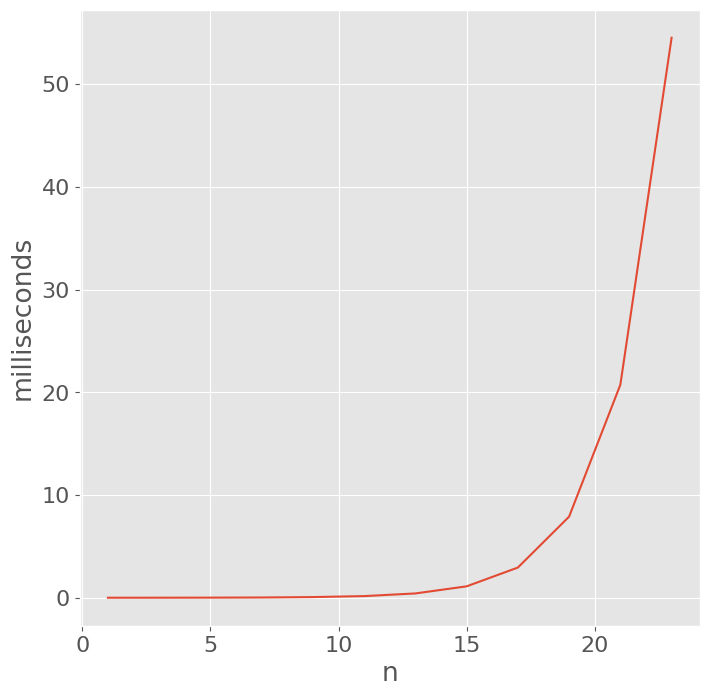

In [7]:
def fib(n):
    if n <= 1:
        return n
    return fib(n - 2) + fib(n - 1)

plot_times('fib', range(1, 25, 2))

## Memoization Revisited

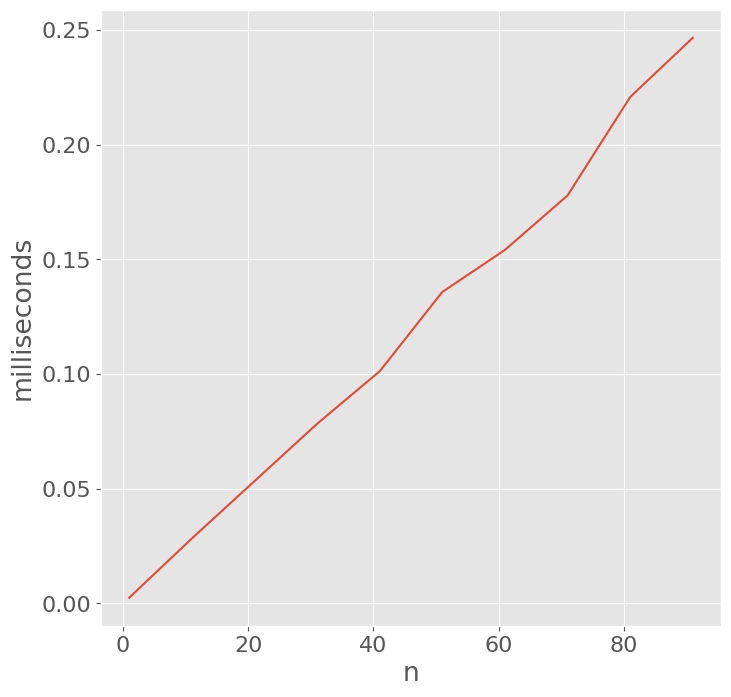

In [8]:
def memoized_fib(n):
    cache = {}
    def memoized(n):
        if n not in cache:
            if n <= 1:
                return n
            cache[n] = memoized(n - 1) + memoized(n - 2)
        return cache[n]
    return memoized(n)

plot_times('memoized_fib', range(1, 100, 10))

## Revisiting Functions

### Sum Digits

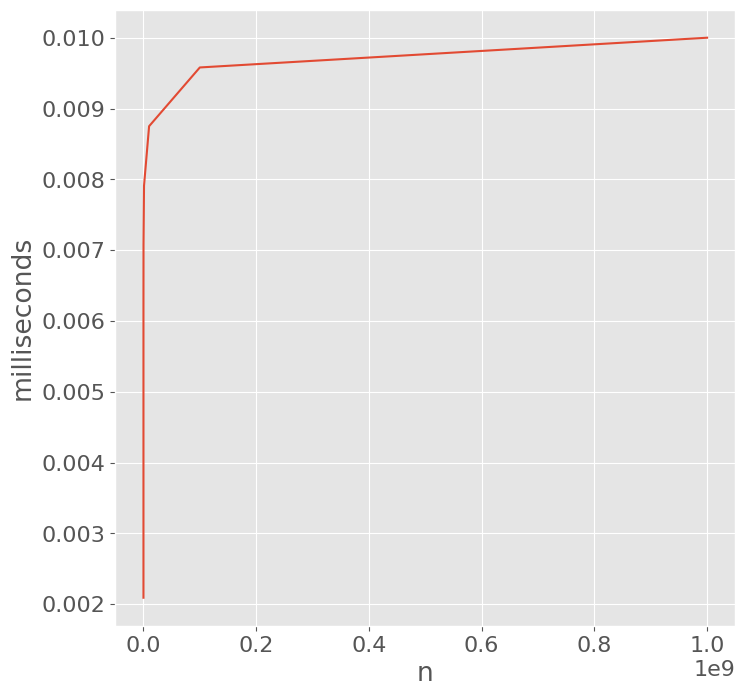

In [9]:
def sum_digits(n):
    """
    >>> sum_digits(12345)
    15
    """
    if n == 0:
        return 0
    return sum_digits(n // 10) + n % 10

plot_times('sum_digits', [10 ** n_zeros for n_zeros in range(10)])

### Count Partitions

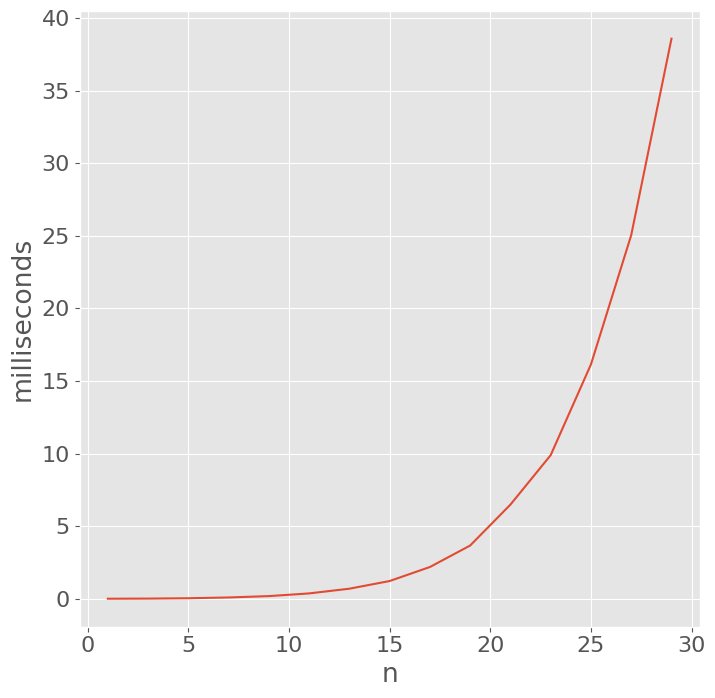

In [10]:
def count_partitions(n, k):
    if n == 0:
        return 1
    elif k == 0 or n < 0:
        return 0
    return count_partitions(n - k, k) + count_partitions(n, k - 1)

wrapper = lambda n: count_partitions(n, n)
plot_times('wrapper', range(1, 30, 2))

### Linked Lists vs Python Lists

In [11]:
from link import *

In [12]:
def create_link(n, vals):
    lnk = Link.empty
    i = 0
    while n > 0:
        lnk = Link(vals[i], lnk)
        n -= 1
        i += 1
    return lnk
def len_link(s):
    res = 0
    while s is not Link.empty:
        s = s.rest
        res += 1
    return res

In [13]:
n = 1000000
lst = list(range(n))

In [14]:
len(lst)

1000000

In [15]:
%%time
for _ in range(100):
    lst.insert(0, -1)

CPU times: user 65.1 ms, sys: 6.31 ms, total: 71.4 ms
Wall time: 75.5 ms


In [17]:
len(lst)
lst[:10]

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]

In [18]:
lnked_lst = create_link(n, list(range(n)))

In [19]:
%%time
for _ in range(100):
    lnked_lst = Link(-1, lnked_lst)

CPU times: user 62 µs, sys: 4 µs, total: 66 µs
Wall time: 70.1 µs


In [20]:
len_link(lnked_lst)

1000100

In [22]:
lnked_lst.rest.first

-1

In [ ]:
# Linked List Efficiency
## Insertion
### Inserting at front = Constant
### Inserting at the back = Linear